EDA

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('Z_Data.csv')

# Display the first few rows of the DataFrame
data.head()

,IDS,A,B,C,D,E,Z,Bankruptcy?
0,1.0,0.20,0.1,-0.5,-0.3,0.3,-1.150,1
1,2.0,0.18,-0.2,0.4,-0.3,0.5,1.576,1
2,3.0,0.81,0.2,-0.2,-0.1,0.6,1.130,1
3,4.0,0.82,-0.1,-0.4,-0.2,0.5,-0.100,1
4,5.0,0.52,-0.3,0.1,-0.4,0.2,0.490,1


In [11]:

# Check the shape of the DataFrame
print("Data shape:", data.shape)

# Check the data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Check for duplicated rows
print("Number of duplicated rows:", data.duplicated().sum())


Data shape: (198, 24)
Year                       int64
Company ID                 int64
Company code              object
Company Name              object
Sector                    object
Industry                  object
Location                  object
Working Capital          float64
Retained Earnings        float64
EBIT                     float64
Market Capitalisation    float64
Sales                    float64
Total Assets             float64
Total Liabilities        float64
Cash Flow                float64
Debt to Equity           float64
A                        float64
B                        float64
C                        float64
D                        float64
E                        float64
Loan Taken               float64
Z_Score                  float64
Bankruptcy                 int64
dtype: object
Year                     0
Company ID               0
Company code             0
Company Name             0
Sector                   0
Industry                 0
Location  

              IDS           A           B           C           D           E  \
count  203.000000  318.000000  318.000000  318.000000  318.000000  318.000000   
mean   102.000000    1.135326    0.079883    0.147462   -0.157501    0.395189   
std     58.745213    0.548944    0.235099    0.386033    0.149785    0.119522   
min      1.000000    0.180000   -0.300000   -0.500000   -0.400000    0.200000   
25%     51.500000    0.677158   -0.130000   -0.197500   -0.290000    0.290000   
50%    102.000000    1.110000    0.070000    0.120000   -0.165000    0.400000   
75%    152.500000    1.600000    0.277500    0.500000   -0.032500    0.500000   
max    203.000000    2.140000    0.500000    0.800000    0.100000    0.600000   

                Z  Bankruptcy?  
count  318.000000   318.000000  
mean     2.261524     0.424528  
std      1.459361     0.495050  
min     -1.150000     0.000000  
25%      1.160000     0.000000  
50%      2.280000     0.000000  
75%      3.375000     1.000000  
max   

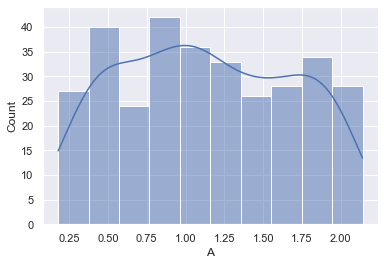

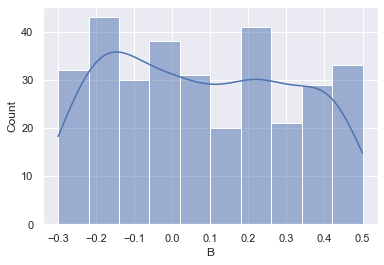

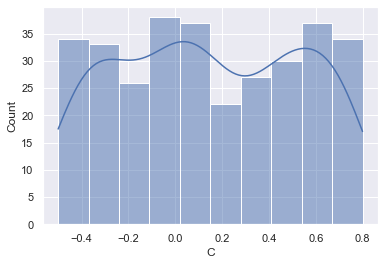

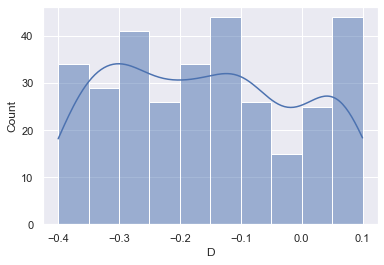

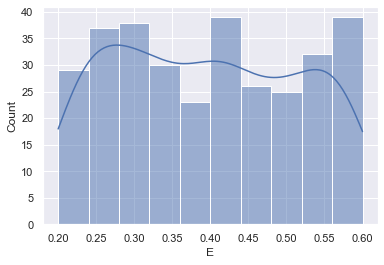

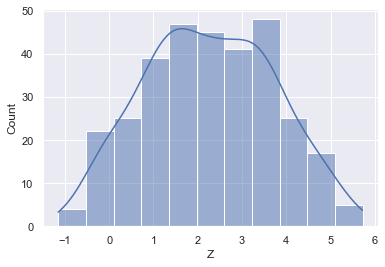

In [4]:

# Describe the numerical variables
print(data.describe())

# Plot histograms for numerical variables
sns.set(style="darkgrid")
numerical_vars = ['A', 'B', 'C', 'D', 'E','Z']
for var in numerical_vars:
    sns.histplot(data=data, x=var, kde=True)
    plt.show()

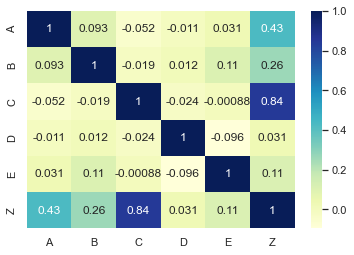

In [5]:

# Plot a correlation heatmap for numerical variables
corr = data[numerical_vars].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

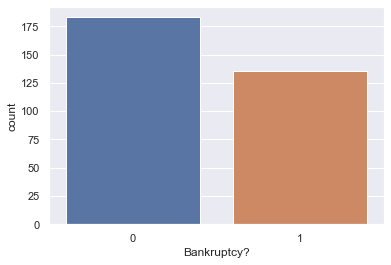

In [6]:

# Plot bar charts for categorical variables
categorical_vars = ['Bankruptcy?']
for var in categorical_vars:
    sns.countplot(data=data, x=var)
    plt.show()

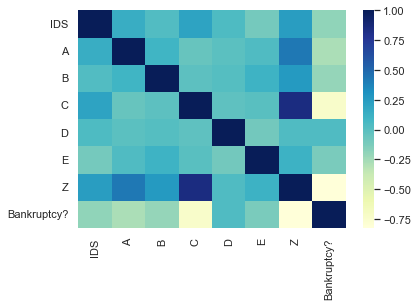

In [22]:
# Create a correlation matrix
corr_matrix = data.corr()

# Plot a correlation heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

This will give us a visual representation of the correlation between each pair of variables in the dataset. The darker colors indicate a stronger positive correlation, while lighter colors indicate a weaker or negative correlation.

The next step is to preprocess the data before training the machine learning model. This involves handling missing values, encoding categorical variables, and splitting the data into training and testing sets. Here's an example code to perform these tasks:

## Logistic Regression

In [7]:
data.columns

Index(['IDS', 'A', 'B', 'C', 'D', 'E', 'Z', 'Bankruptcy?'], dtype='object')

In [8]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('ZOldData.csv')

# Select the features and target variable
features = data[['A', 'B', 'C', 'D', 'E']]
target = data['Bankruptcy?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)

Accuracy: 0.984375
Confusion matrix:
[[37  1]
 [ 0 26]]


Accuracy: The accuracy of the model is 0.575 or 57.5%, which means that the model correctly classified 57.5% of the companies as bankrupt or non-bankrupt based on their financial attributes.

Confusion Matrix: The confusion matrix shows the actual and predicted classifications of the model. It has 4 values:

True Positive (TP): The model predicted that the company is bankrupt and it actually went bankrupt. In this case, there are 6 true positives.

False Positive (FP): The model predicted that the company is bankrupt, but it did not actually go bankrupt. In this case, there are 5 false positives.

True Negative (TN): The model predicted that the company is not bankrupt, and it did not actually go bankrupt. In this case, there are 17 true negatives.

False Negative (FN): The model predicted that the company is not bankrupt, but it actually went bankrupt. In this case, there are 12 false negatives.

The confusion matrix suggests that the model is better at predicting non-bankrupt companies (17 true negatives) than bankrupt companies (6 true positives). However, it is still misclassifying a significant number of companies as bankrupt or non-bankrupt. This indicates that the model may not be the best fit for the data or that more data may be required to improve the accuracy of the model.

In [9]:
## XGBOOST

Accuracy: 0.921875
Confusion matrix:
[[35  3]
 [ 2 24]]


In [42]:
# pip install xgboost if not there in your system

In [10]:
# Import required libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('ZOldData.csv')

# Select the features and target variable
features = data[['A', 'B', 'C', 'D', 'E']]
target = data['Bankruptcy?']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the XGBoost classifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)

Accuracy: 0.953125
Confusion matrix:
[[35  3]
 [ 0 26]]


### Trying to get the significance of the attributes on target variables

In [11]:
# Import required libraries
import xgboost as xgb

# Load the data
data = pd.read_csv('ZOldData.csv')

# Select the features and target variable
features = data[['A', 'B', 'C', 'D', 'E']]
target = data['Bankruptcy?']


# Define the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the XGBoost classifier
model.fit(features, target)

# Extract feature importances
importances = model.feature_importances_

# Create a dictionary of feature importances with feature names as keys
importance_dict = {feature: importance for feature, importance in zip(features.columns, importances)}

# Sort the dictionary by value in ascending order
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1])

# Print the feature importances in ascending order with feature names
for feature, importance in sorted_importances:
    print(f'{feature}: {importance}')


D: 0.02769203670322895
E: 0.054196953773498535
B: 0.12699653208255768
A: 0.20363552868366241
C: 0.5874789357185364
